# **Milestones 2**
### **HACTIV8 Full Time Data Science Phase 1**

# **1. Perkenalan** 

## **1.1 Identitas**

> Nama  : Ropiudin

> Batch : FTDS OO2-HCK

> Milestones : Milestones 2

## **1.2 Dataset**

> Pada Milestones ini dataset yang digunakan adalah *Hepatitis C Prediction Dataset* dari wabset kaggel dengan link sebagai berikut [link](https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset). Dataset ini merupakan kumpulan data berisi hasil laboratorium terhadap darah suatu pasien yang mana dari hasil laboratorium, pasien dapat diklasifikasi mengidap penyakit hepatitis C atau tidak 

## **1.3 Objective**

> Pada Milestones ini akan dilakukan pembuatan model machine learning Supervised Classification untuk memprediksi pasien yang mengidap penyakit Hepatitis C

# **2. Import Libraries** 

In [1]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.4 MB/s 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import  MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix


import warnings
warnings.filterwarnings(action='ignore')

> Code di atas merupakan daftar *library* yang digunakan dalam milestones ini

# **3. Data Loading** 

In [3]:
df = pd.read_csv('HepatitisCdata.csv', na_values=['?',' ','99999','N/A'],skipinitialspace=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.precision", 0)

In [4]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.500,52.500,7.700,22.100,7.500,6.930,3.230,106.000,12.100,69.000
1,2,0=Blood Donor,32,m,38.500,70.300,18.000,24.700,3.900,11.170,4.800,74.000,15.600,76.500
2,3,0=Blood Donor,32,m,46.900,74.700,36.200,52.600,6.100,8.840,5.200,86.000,33.200,79.300
3,4,0=Blood Donor,32,m,43.200,52.000,30.600,22.600,18.900,7.330,4.740,80.000,33.800,75.700
4,5,0=Blood Donor,32,m,39.200,74.100,32.600,24.800,9.600,9.150,4.320,76.000,29.900,68.700


In [5]:
df.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.000,416.600,5.900,110.300,50.000,5.570,6.300,55.700,650.900,68.500
611,612,3=Cirrhosis,64,f,24.000,102.800,2.900,44.400,20.000,1.540,3.020,63.000,35.900,71.300
612,613,3=Cirrhosis,64,f,29.000,87.300,3.500,99.000,48.000,1.660,3.630,66.700,64.200,82.000
613,614,3=Cirrhosis,46,f,33.000,NaN,39.000,62.000,20.000,3.560,4.200,52.000,50.000,71.000
614,615,3=Cirrhosis,59,f,36.000,NaN,100.000,80.000,12.000,9.070,5.300,67.000,34.000,68.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [7]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

> Berdasarkan hasil diatas diperoleh informasi bahwa dataset yang digunakan terdiri dari 615 entri data dan 14 kolom, dan dari informasi diatas diketahui bahwa pada dataset terdapat missing value pada kolom ALB, ALP, ALT, CHOL dan PROT

> Untuk handling missing value akan dilakukan simple imputer pada proses preprocessing

In [8]:
df[df.duplicated()].shape

(0, 14)

> Tidak terdapat data duplikat pada dataset

In [9]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000,615.000,614.000,597.000,614.000,615.000,615.000,615.000,605.000,615.000,615.000,614.000
mean,308.000,47.408,41.620,68.284,28.451,34.786,11.397,8.197,5.368,81.288,39.533,72.044
std,177.679,10.055,5.781,26.028,25.470,33.091,19.673,2.206,1.133,49.756,54.661,5.403
min,1.000,19.000,14.900,11.300,0.900,10.600,0.800,1.420,1.430,8.000,4.500,44.800
25%,154.500,39.000,38.800,52.500,16.400,21.600,5.300,6.935,4.610,67.000,15.700,69.300
50%,308.000,47.000,41.950,66.200,23.000,25.900,7.300,8.260,5.300,77.000,23.300,72.200
75%,461.500,54.000,45.200,80.100,33.075,32.900,11.200,9.590,6.060,88.000,40.200,75.400
max,615.000,77.000,82.200,416.600,325.300,324.000,254.000,16.410,9.670,1079.100,650.900,90.000


Berikut dibawah ini merupak penjelasan dari, setiap kolom pada dataset yang digunakan:

Semua atribut kecuali Category dan Sex adalah numerik.

Atribut 1 sampai 4 mengacu pada data pasien:

- `Unnamed: 0` : Nomor ID Pasien/Pengidentifikasi unik
- `Category` : Kategori/Tipe pasien (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')
- `Age` : Usia di tahun ini dalam satuan tahun
- `Sex` : Jenis kelamin (m : male , f : female)

Atribut 5 sampai 14 mengacu pada data laboratorium:

- `ALB` : Albumin Blood Test 
- `ALP` : Alkaline phosphatase 
- `ALT` : Alanine Transaminase
- `AST` : Aspartat Transaminase
- `BIL` : Bilirubin
- `CHE` : Acetylcholinesterase
- `CHOL` : Cholesterol
- `CREA` : Creatinine
- `GGT` : Gamma-Glutamyl Transferase
- `PROT` : Proteins

Definisi dari setiap atribut:

> - **Albumin** adalah protein dalam darah manusia yang diproduksi oleh hati
> - **Alkalin fosfatase** adalan enzim dalam aliran darah yang bertugas membantu memecah protein dalam tubuh
> - **Alanina transaminase** adalah enzim yang dapat dijumpai di dalam serum darah dan berbagai jaringan tubuh, tetapi sering kali dikaitkan dengan kinerja organ hati
> - **Transaminase aspartat** adalah enzim golongan transaminase yang sering dikaitkan dengan kinerja organ hati, seperti enzim ALT.
> - **Bilirubin** adalah zat yang terbentuk secara normal dari proses penguraian sel darah merah di dalam tubuh
> - **Acetylcholinesterase** adalah Enzim yang terdapat pada susunan saraf pusat, terutama pada jaringan saraf, otot, dan sel darah merah, yang mengkatalisis hidrolisis asetilkolin menjadi kolin dan asam asetat
> - **Kolesterol** adalah metabolit yang mengandung lemak sterol yang ditemukan pada membran sel dan disirkulasikan dalam plasma darah
> - **Kreatinin** adalah zat limbah dalam darah yang diproduksi oleh jaringan otot saat Anda bergerak atau beraktivitas. Jumlah kreatinin di dalam darah diatur oleh ginjal
>- **Gamma Glutamyl Transferase** adalah bagian dari tes fungsi hati yang bertujuan untuk menilai kondisi kesehatan organ hati. Gamma-glutamyl transferase (GGT) merupakan enzim yang ditemukan di berbagai organ tubuh
> - **Protein** adalah makromolekul atau molekul raksasa yang merupakan gabungan dari asam amino lewat ikatan peptida

> Berdasarkan penjelasan diatas, dataset dapat dikelompokkan menjadi data kolom numerik dan data kolom kategorik

> Berikut dibawah ini dilakukan pengelompokan data kolom numerik dan kolom kategorik

In [10]:
num_col = ['Unnamed: 0','Age', 'ALB', 'ALP', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
cat_col = ['Category', 'Sex']

In [11]:
# numeric overview
df[num_col].describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000,615.000,614.000,597.000,614.000,615.000,615.000,615.000,605.000,615.000,615.000,614.000
mean,308.000,47.408,41.620,68.284,28.451,34.786,11.397,8.197,5.368,81.288,39.533,72.044
std,177.679,10.055,5.781,26.028,25.470,33.091,19.673,2.206,1.133,49.756,54.661,5.403
min,1.000,19.000,14.900,11.300,0.900,10.600,0.800,1.420,1.430,8.000,4.500,44.800
25%,154.500,39.000,38.800,52.500,16.400,21.600,5.300,6.935,4.610,67.000,15.700,69.300
50%,308.000,47.000,41.950,66.200,23.000,25.900,7.300,8.260,5.300,77.000,23.300,72.200
75%,461.500,54.000,45.200,80.100,33.075,32.900,11.200,9.590,6.060,88.000,40.200,75.400
max,615.000,77.000,82.200,416.600,325.300,324.000,254.000,16.410,9.670,1079.100,650.900,90.000


In [12]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

Category

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64
----------
Sex

m    377
f    238
Name: Sex, dtype: int64
----------


> Berdasarkan kolom Category yang merupakan sebagai kolom target pada dataset ini, akan dilakukan feature engineering yang mana label *0=Blood Donor* akan didefinisikan sebagai label 0 atau **Blood Donor** yang mana pasien tidak mengidap penyakit Hepatitis C dan dapat melakukan donor darah, Sedangkan label *3=Cirrhosis, 1=Hepatitis, 2=Fibrosis* dan *0s=suspect Blood Donor* akan didefinisikan sebagai label 1 atau **Hepatitis C** yang berarti pasien mengidap penyakit Hepatitis C

> label *3=Cirrhosis, 1=Hepatitis* dan *2=Fibrosis* digabungkan menjadi label 1 atau **Hepatitis C** dikarnakan dari ketiga label tersebut merupakn penyakit pada bagian hati sehingga bisa digabungkan menjadi satu yaitu Hepatitis C, Sedangkan alasan menggabungkan *0s=suspect Blood Donor* dikarnakan ada keraguan tehadap pasien bisa melakukan Blood Donor atau tidak, oleh sebab itu pada label *0s=suspect Blood Donor* digabungkan ke label 1

# **4. Data Cleaning** 

In [13]:
df_clean = df.copy()
df_clean.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.500,52.500,7.700,22.100,7.500,6.930,3.230,106.000,12.100,69.000
1,2,0=Blood Donor,32,m,38.500,70.300,18.000,24.700,3.900,11.170,4.800,74.000,15.600,76.500
2,3,0=Blood Donor,32,m,46.900,74.700,36.200,52.600,6.100,8.840,5.200,86.000,33.200,79.300
3,4,0=Blood Donor,32,m,43.200,52.000,30.600,22.600,18.900,7.330,4.740,80.000,33.800,75.700
4,5,0=Blood Donor,32,m,39.200,74.100,32.600,24.800,9.600,9.150,4.320,76.000,29.900,68.700


In [14]:
df_clean = df_clean.drop(columns='Unnamed: 0')
df_clean.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.500,52.500,7.700,22.100,7.500,6.930,3.230,106.000,12.100,69.000
1,0=Blood Donor,32,m,38.500,70.300,18.000,24.700,3.900,11.170,4.800,74.000,15.600,76.500
2,0=Blood Donor,32,m,46.900,74.700,36.200,52.600,6.100,8.840,5.200,86.000,33.200,79.300
3,0=Blood Donor,32,m,43.200,52.000,30.600,22.600,18.900,7.330,4.740,80.000,33.800,75.700
4,0=Blood Donor,32,m,39.200,74.100,32.600,24.800,9.600,9.150,4.320,76.000,29.900,68.700


> Dilakukan penghapusan kolom pada kolom Unnamed: 0, dikarnakan pada kolom Unnamed: 0 hanya merupakan Number ID disetiap pasian dan dirasa tidak digunakan dalam pemodelan

In [15]:
df_clean.rename({'Category': 'Target'}, axis=1, inplace=True)
df_clean.head()

,Target,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.500,52.500,7.700,22.100,7.500,6.930,3.230,106.000,12.100,69.000
1,0=Blood Donor,32,m,38.500,70.300,18.000,24.700,3.900,11.170,4.800,74.000,15.600,76.500
2,0=Blood Donor,32,m,46.900,74.700,36.200,52.600,6.100,8.840,5.200,86.000,33.200,79.300
3,0=Blood Donor,32,m,43.200,52.000,30.600,22.600,18.900,7.330,4.740,80.000,33.800,75.700
4,0=Blood Donor,32,m,39.200,74.100,32.600,24.800,9.600,9.150,4.320,76.000,29.900,68.700


> Merubah nama kolom Category menjadi kolom Target guna mempermudah diproses selanjutnya

In [16]:
df_clean['Target'].replace({'0=Blood Donor': 0, '3=Cirrhosis': 1, '1=Hepatitis': 1, '2=Fibrosis': 1, '0s=suspect Blood Donor': 1}, inplace=True)
df_clean['Target'].value_counts()

0    533
1     82
Name: Target, dtype: int64

> Melakukan feature engineering terhadap kolom target, sesuai dengan penjelasan sebelumnya

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  615 non-null    int64  
 1   Age     615 non-null    int64  
 2   Sex     615 non-null    object 
 3   ALB     614 non-null    float64
 4   ALP     597 non-null    float64
 5   ALT     614 non-null    float64
 6   AST     615 non-null    float64
 7   BIL     615 non-null    float64
 8   CHE     615 non-null    float64
 9   CHOL    605 non-null    float64
 10  CREA    615 non-null    float64
 11  GGT     615 non-null    float64
 12  PROT    614 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 62.6+ KB


> Pada tahapan data cleaning, dataset masih terdapat missing value karna pada tahap ini tidak dilakukan handling missing value. Handling missing value akan dilakukan pada tahap data preprocessing

# **5. Exploratory Data Analysis (EDA)** 

In [18]:
df_clean.head()

,Target,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.500,52.500,7.700,22.100,7.500,6.930,3.230,106.000,12.100,69.000
1,0,32,m,38.500,70.300,18.000,24.700,3.900,11.170,4.800,74.000,15.600,76.500
2,0,32,m,46.900,74.700,36.200,52.600,6.100,8.840,5.200,86.000,33.200,79.300
3,0,32,m,43.200,52.000,30.600,22.600,18.900,7.330,4.740,80.000,33.800,75.700
4,0,32,m,39.200,74.100,32.600,24.800,9.600,9.150,4.320,76.000,29.900,68.700


In [19]:
df_clean['Target'].value_counts().reset_index()

,index,Target
0,0,533
1,1,82


Text(0.5, 1.0, 'Grafik count Target')

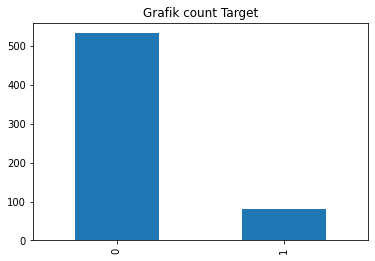

In [20]:
df_clean['Target'].value_counts().plot(kind='bar')
plt.title('Grafik count Target')

> Berdasarkan tabel atau grafik diatas, diperoleh informasi bahwa pada kolom data target label 0 memiliki data sebanyak 533 data atau pasien sedangkan label 1 memiliki data sebanyak 82 data atau pasien

> Berdasarkan informasi diatas, dapat disimpulkan bahwa pada kolom target memiliki data yang imbalance, sehingga perlu adanya handling imbalance. Akan tetapi pada proses pemodelin ini akan ditinjau terlebih dahulu performa model terhadap kolom target yang imbalance dan selanjutnya akan dipertimbangkan untuk menggunakan data yang imbalance atau balance berdasarkan dari hasil performa model yang didapatkan

In [21]:
df_clean['Target'].value_counts()/len(df_clean['Target']) *100

0   86.667
1   13.333
Name: Target, dtype: float64

Text(0.5, 1.0, 'Grafik count Target terhadap Sex')

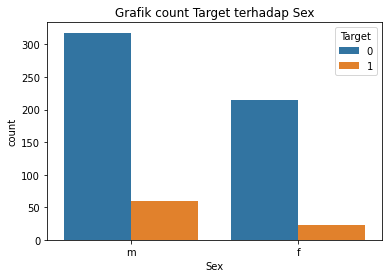

In [22]:
sns.countplot(data=df_clean,x='Sex',hue='Target')
plt.title('Grafik count Target terhadap Sex')

> Grafik diatas merupakan barplot kolom Sex terhadap kolom target, yang mana pasien dengan jenis kelamin m atau pria kebanyakan tidak mengidap penyakit Hepatitis C dibandingkan dengan yang mengidap penyakit Hepatitis C

> Sedangkan pasien dengan jenis kelamin f atau perempuan, kebanyakan tidak mengidap penyakit Hepatitis C dibandingkan dengan yang mengidap penyakit Hepatitis C

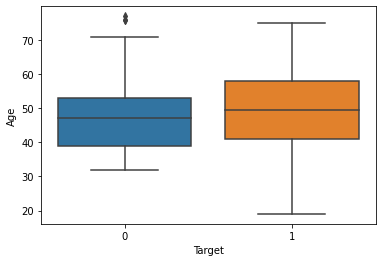

In [23]:
sns.boxplot(data=df_clean, x='Target', y='Age')

> Berdasarkan grafik boxplot diatas yang merupakan boxplot antara kolom age dengan kolom target, dapat diartikan bahwa pada pasien yang tidak mengidap penyakit Hepatitis C memiliki pemusatan data disekitar umur 35 - 55 tahun, dan pada label 0 terdapat outlier

> Sedangkan pada pasien yang mengidap penyakit Hepatitis C memiliki pemusatan data disekitan 40 - 60 tahun

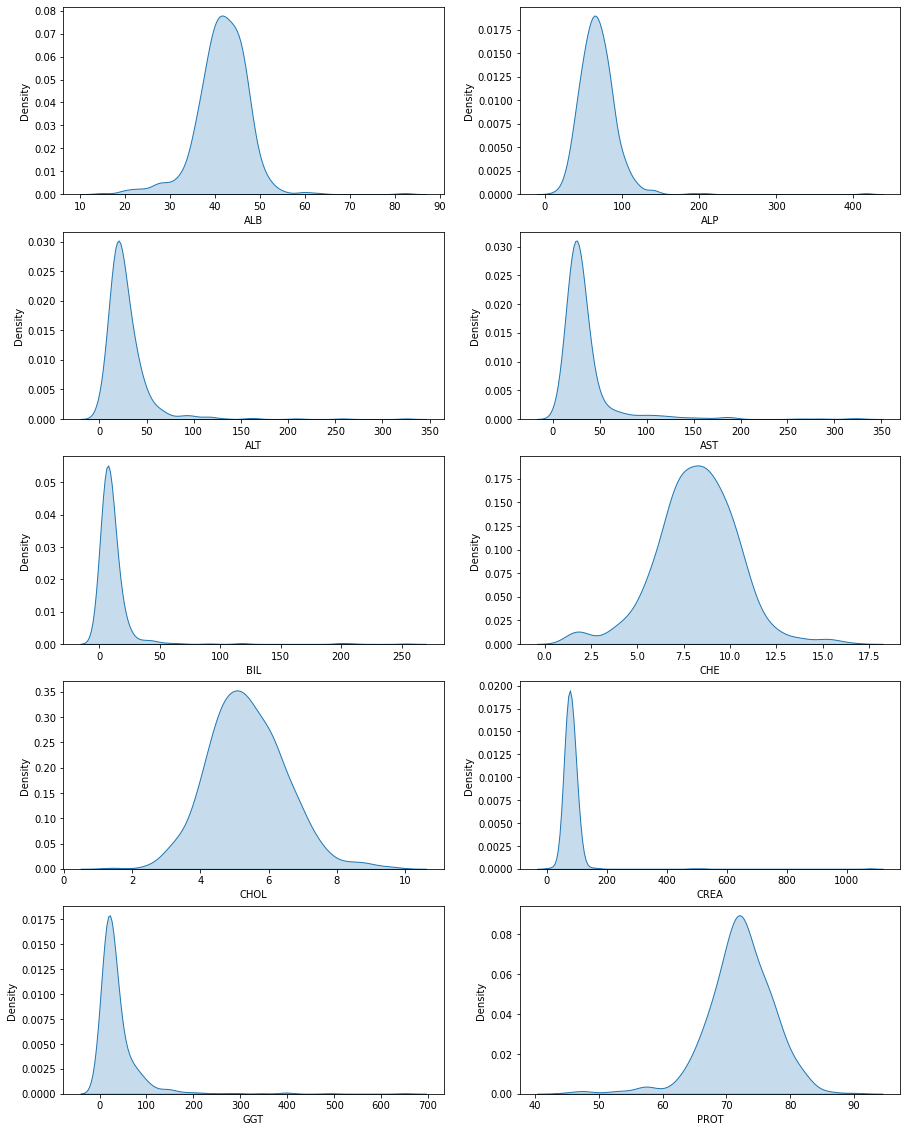

In [24]:
df_num = df_clean[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE','CHOL', 'CREA', 'GGT', 'PROT']]

fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(15,20))
i=0
j=0
for col in df_num.columns:
    sns.kdeplot(data=df_num, x=col, fill=True,ax=axes[i][j])
    j+=1
    if j>1:
        i+=1
        j=0
    if i==5:
        break

> Berdasarkan grafik diatas dapat diinterpretasikan sebagai berikut:

- Grafik diatas merupakan grafik terhadapa kolom yang merupakan data dari test laboratorium, dan berdasarkan grafik diatas setiap kolom hanya memiliki satu titik puncak saja yang berarti terdapat kolom yang memiliki distriusi normal

- Dari grafik diatas dapat diketahui bahwa secara visual terdapat outlier pada kolom - kolom yang memiliki distribusi skew, dan rata - rata setiap kolom memiliki distribusi skew kekanan, yang mana terdapat nilai yang sangat besar dibandingkan dengan yang lainnya


# **6. Data Preprocessing**

In [25]:
df_clean.head()

,Target,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.500,52.500,7.700,22.100,7.500,6.930,3.230,106.000,12.100,69.000
1,0,32,m,38.500,70.300,18.000,24.700,3.900,11.170,4.800,74.000,15.600,76.500
2,0,32,m,46.900,74.700,36.200,52.600,6.100,8.840,5.200,86.000,33.200,79.300
3,0,32,m,43.200,52.000,30.600,22.600,18.900,7.330,4.740,80.000,33.800,75.700
4,0,32,m,39.200,74.100,32.600,24.800,9.600,9.150,4.320,76.000,29.900,68.700


### **Splitting between `X` (Features), `y` (Target) and `inf` (Inference)**

> Pada tahapan ini akan dilakukan pembagian data pada dataset menjadi 3 data, yaitu data inference, data train dan data test

In [26]:
df_inf = df_clean.sample(5,random_state=0)
df_inf

,Target,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
49,0,36,m,47.800,89.000,48.500,38.400,8.600,8.260,5.620,96.000,21.900,76.200
496,0,56,f,45.100,79.100,39.000,30.500,5.200,6.470,5.100,64.000,145.300,66.700
211,0,51,m,45.900,66.700,31.800,28.100,9.000,10.080,5.610,85.000,36.200,73.000
249,0,55,m,44.700,71.600,22.900,22.100,5.500,6.820,4.610,105.000,59.200,72.700
142,0,45,m,43.200,68.200,27.800,42.300,6.600,10.930,6.610,105.000,27.200,74.500


In [27]:
df_clean = df_clean.drop(df_inf.index)
df_clean

,Target,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.500,52.500,7.700,22.100,7.500,6.930,3.230,106.000,12.100,69.000
1,0,32,m,38.500,70.300,18.000,24.700,3.900,11.170,4.800,74.000,15.600,76.500
2,0,32,m,46.900,74.700,36.200,52.600,6.100,8.840,5.200,86.000,33.200,79.300
3,0,32,m,43.200,52.000,30.600,22.600,18.900,7.330,4.740,80.000,33.800,75.700
4,0,32,m,39.200,74.100,32.600,24.800,9.600,9.150,4.320,76.000,29.900,68.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,f,32.000,416.600,5.900,110.300,50.000,5.570,6.300,55.700,650.900,68.500
611,1,64,f,24.000,102.800,2.900,44.400,20.000,1.540,3.020,63.000,35.900,71.300
612,1,64,f,29.000,87.300,3.500,99.000,48.000,1.660,3.630,66.700,64.200,82.000
613,1,46,f,33.000,NaN,39.000,62.000,20.000,3.560,4.200,52.000,50.000,71.000


In [28]:
df_clean.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)
df_inf

,Target,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,36,m,47.800,89.000,48.500,38.400,8.600,8.260,5.620,96.000,21.900,76.200
1,0,56,f,45.100,79.100,39.000,30.500,5.200,6.470,5.100,64.000,145.300,66.700
2,0,51,m,45.900,66.700,31.800,28.100,9.000,10.080,5.610,85.000,36.200,73.000
3,0,55,m,44.700,71.600,22.900,22.100,5.500,6.820,4.610,105.000,59.200,72.700
4,0,45,m,43.200,68.200,27.800,42.300,6.600,10.930,6.610,105.000,27.200,74.500


> Untuk data inference digunakan 5 data yang diambil secara random pada dataset untuk digunakan pada tahap model inference yang bertujuan untuk menguji model yang sudah dibuat berfungi atau tidak ketikan dimasukan data baru selain data train dan data test

In [29]:
X = df_clean.drop('Target', axis=1)
y = df_clean['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
# for EDA model creation we will use dataframe stored in df_eda
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(488, 12)
(122, 12)
(488,)
(122,)


 > Spliting data menjadi data feature dan data target yang mana dataset sebelumnya sudah di ambil sebagian untuk data inference. Data feature dan data target, selanjutnya dibagi menjadi dua, yaitu sebagai data train dan data test yang mana pembagian data sebanyak 80% data train dan 20% data test

In [31]:
df_eda = pd.concat([X_train, y_train], axis=1)

df_eda.shape

(488, 13)

## **6.1 Exploratory Data Analysis (EDA) - Modeling**

In [32]:
df_eda.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Target
303,67,m,44.800,72.800,39.400,28.400,23.300,7.840,7.020,97.000,78.300,67.500,0
90,39,m,46.100,77.100,34.900,37.600,4.100,13.860,8.110,94.000,76.900,71.100,0
529,48,m,24.900,116.900,49.200,24.300,4.900,3.440,5.250,29.000,83.000,47.800,1
447,50,f,34.600,63.000,24.700,31.000,12.800,6.550,5.950,70.000,25.400,70.200,0
200,50,m,43.800,56.900,29.500,32.800,4.100,7.770,5.800,72.000,53.600,72.500,0


In [33]:
num_col = ['Age', 'ALB', 'ALP', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
cat_col = ['Target', 'Sex']

> Code diatas merupakan pendefinisian kolom mana saja yang termasuk kedalam kolom numerik dan kolom kategorik, hal ini bertujuan untuk mempermudah peroses selanjutnya

### **Numerical Feature**

In [34]:
df_eda[num_col].head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
303,67,44.800,72.800,39.400,28.400,23.300,7.840,7.020,97.000,78.300,67.500
90,39,46.100,77.100,34.900,37.600,4.100,13.860,8.110,94.000,76.900,71.100
529,48,24.900,116.900,49.200,24.300,4.900,3.440,5.250,29.000,83.000,47.800
447,50,34.600,63.000,24.700,31.000,12.800,6.550,5.950,70.000,25.400,70.200
200,50,43.800,56.900,29.500,32.800,4.100,7.770,5.800,72.000,53.600,72.500


In [35]:
df_eda[num_col].shape

(488, 11)

In [36]:
# numeric overview
df_eda[num_col].describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,488.000,487.000,472.000,487.000,488.000,488.000,488.000,481.000,488.000,488.000,487.000
mean,47.613,41.571,68.421,27.791,34.556,12.030,8.180,5.377,81.830,39.834,72.073
std,10.234,5.791,26.853,21.813,32.748,21.676,2.203,1.140,51.603,56.048,5.331
min,19.000,20.000,11.300,0.900,10.600,1.800,1.420,1.430,8.000,4.500,44.800
25%,39.000,38.700,52.450,16.300,21.675,5.300,6.930,4.600,67.750,15.550,69.300
50%,47.000,41.700,66.200,22.900,25.900,7.300,8.215,5.310,77.000,23.300,72.200
75%,55.000,45.150,80.750,32.600,32.900,11.825,9.605,6.080,89.000,40.125,75.300
max,77.000,82.200,416.600,258.000,324.000,254.000,16.410,9.670,1079.100,650.900,90.000


#### **Handling Missing Value**

In [37]:
df_eda[num_col].isnull().sum()

Age      0
ALB      1
ALP     16
ALT      1
AST      0
BIL      0
CHE      0
CHOL     7
CREA     0
GGT      0
PROT     1
dtype: int64

> Pada data kolom numerik, terdapat missing value pada yaitu pada kolom `ALB`, `ALP`, `ALT`, `CHOL` dan `PROT`. Untuk handling missing value saya melakukan handling dengan cara imputasi yaitu menginput data kedalam missing value, data yang diinput merupakan nilai median, dimana pada kolom yang memiliki missing value kebanyak berdistribusi yang tidak normal atau skew

> Imputasi terhadat missing value. bertujuan untuk jika model sudah jadi dan akan dilakukan model inference, model dapat mengidentifikasi data untuk inference yang memiliki missing value, dan secara otomatis akan melakukan imputasi terhadap data

In [38]:
imp_num = SimpleImputer(strategy='median')

df_eda[num_col] = imp_num.fit_transform(df_eda[num_col])
df_eda[num_col].isnull().sum()

Age     0
ALB     0
ALP     0
ALT     0
AST     0
BIL     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64

> Setelah di cek kembali, data pada kolom numerik sudah tidak terdapat missing value, yang berarti imputasi berhasil digunakan

#### **Handling Outlier**

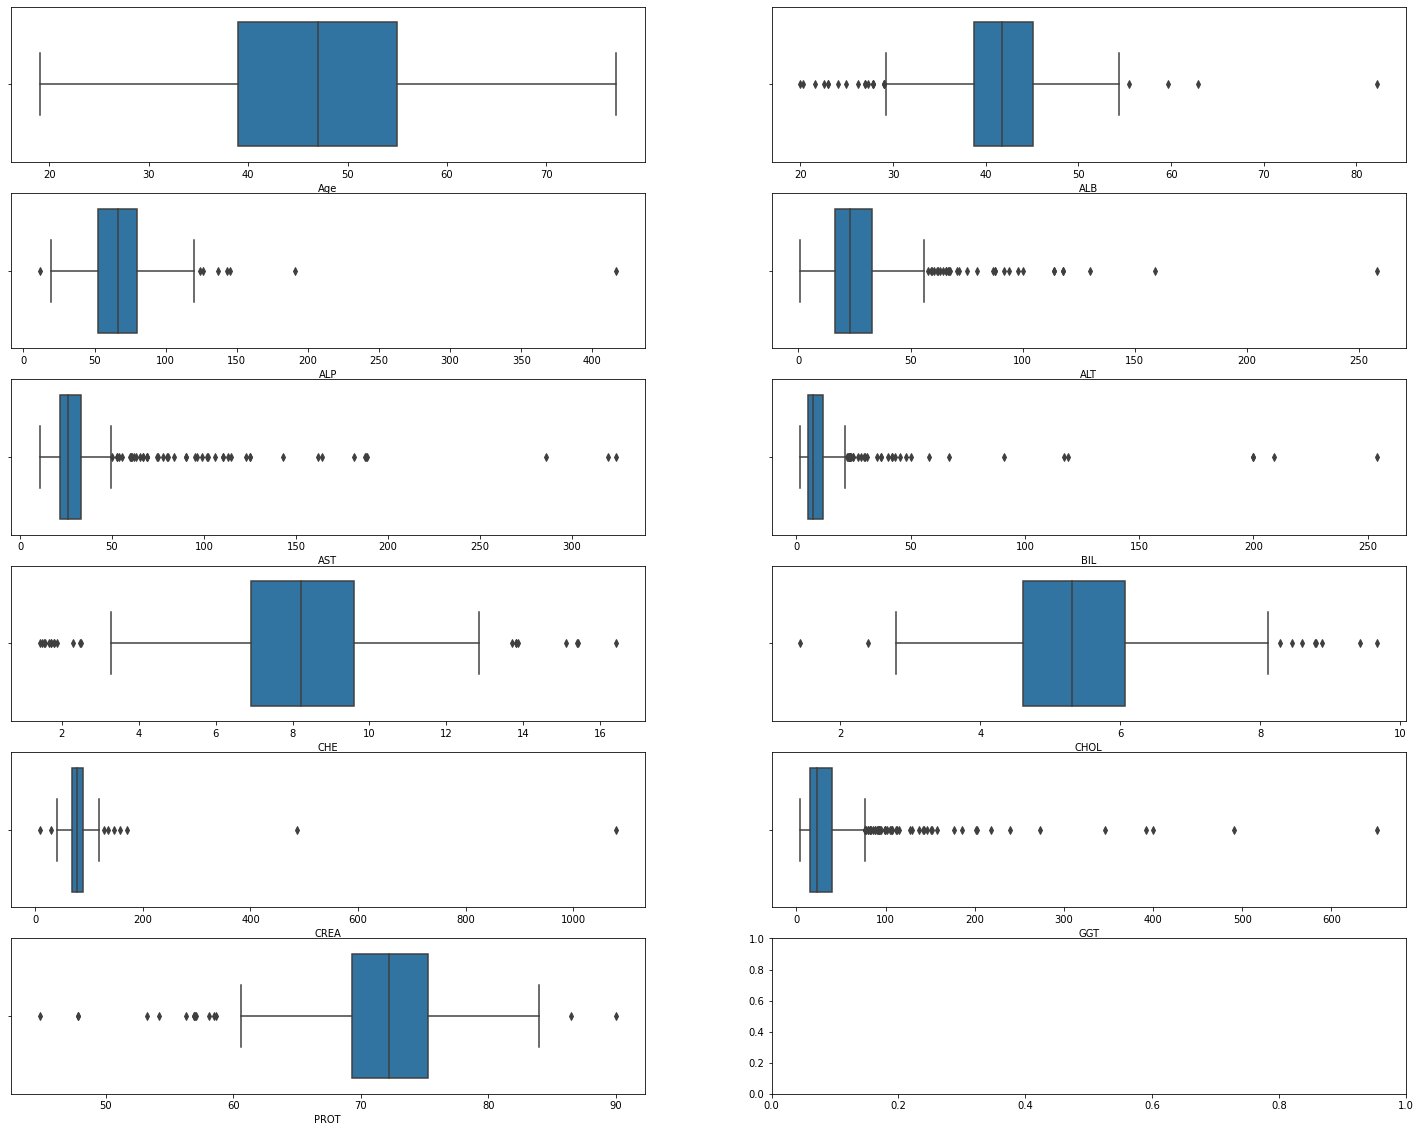

In [39]:
cols_name = ['Age', 'ALB', 'ALP', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

fig, ax = plt.subplots(ncols=2,nrows=6, figsize=[25,20])
ax = ax.flatten()

for idx, col in enumerate(num_col):
    sns.boxplot(df_eda[col], ax=ax[idx])

plt.show()

> Berdasarkan grafik boxplot diatas merupakan grafik pada kolom data numerik, dari hasil boxplot terdapat banyak outlier disetiap kolom numerik, akan tetapi belum diketahui berapa banyak outlier disetiap kolomnya, tahapan dibawah ini akan melihat seberapa banyak outlier disetiap kolom numerik

In [40]:
df_eda[num_col].skew()

Age     0.250
ALB     0.091
ALP     5.107
ALT     4.149
AST     5.236
BIL     7.789
CHE    -0.179
CHOL    0.338
CREA   15.881
GGT     5.766
PROT   -0.871
dtype: float64

> Jika dilihat dari nilai skew disetiap kolom numerik, terdapat 5 kolom yang memiliki distribusi normal karna nilai skew di antara -0.5 sampai 0.5, dan terdapat kolom yang memiliki distribusi tidak normal atau skew karna memiliki nilai skew diatas 0.5 atau dibawah -0.5

> Nilai skew pada setiap kolom numerik perlu diketahui karna berkaitan dengan penentuan method yang digunakan untuk hanling outlier dan scaling

In [41]:
def outlier_analysis(df_eda,col):
  skewness = df_eda[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df_eda[col].mean() + 3*df_eda[col].std()
    lower = df_eda[col].mean() - 3*df_eda[col].std()
  else:
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (3 * IQR)
    lower = Q1 - (3 * IQR)
    
  no_outliers = df_eda[(df_eda[col]>=lower) &  (df_eda[col]<=upper)]
  outliers = df_eda[(df_eda[col]<lower) | (df_eda[col]>upper)]

  return outliers,no_outliers, upper, lower

cols_name = ['Age', 'ALB', 'ALP', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

for i in cols_name:
    out,no_out, up, low = outlier_analysis (df_eda,i)
    print(i)
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(df_eda))*100, '%') 
    print('-'*10)

Age
count of outlier:  0
percentage of outlier:  0.0 %
----------
ALB
count of outlier:  10
percentage of outlier:  2.0491803278688523 %
----------
ALP
count of outlier:  2
percentage of outlier:  0.4098360655737705 %
----------
ALT
count of outlier:  14
percentage of outlier:  2.8688524590163933 %
----------
AST
count of outlier:  36
percentage of outlier:  7.377049180327869 %
----------
BIL
count of outlier:  19
percentage of outlier:  3.8934426229508197 %
----------
CHE
count of outlier:  7
percentage of outlier:  1.4344262295081966 %
----------
CHOL
count of outlier:  6
percentage of outlier:  1.2295081967213115 %
----------
CREA
count of outlier:  4
percentage of outlier:  0.819672131147541 %
----------
GGT
count of outlier:  22
percentage of outlier:  4.508196721311475 %
----------
PROT
count of outlier:  3
percentage of outlier:  0.6147540983606558 %
----------


> Output diatas merupakan outlier disetiap kolom numerik. Berdasarkan hasil output diketahui bahwa hampir setiap kolom numerik memiliki outlier hanya kolom `Age` yang tidak terdapat outlier, yang mana outlier terbanyak berada pada kolom `AST` yaitu sebesar 7.37%, dan terdapat kolom yang memiliki outlier dibawah 1% yaitu terdapat pada kolom `ALP`, `CREA` dan `PROT`. 

> Untuk handling outlier yang menetukan handling outlier terhadap kolom yang memiliki outlier sebanyak dibawah 1% dengan cara melakukan capping menggunakan method winsorizer. Capping winsorizer bertujuan untuk memasukan data outlier kedalam pemusatan data pada kolom sehingga data outlier masuk kedalam pemusatan data dengan range tertentu

> Alasan mengapa hanya handling outlier terhadap kolom yang memiliki outlier dibawah 1% dikarnakan untuk mengurangi kehilangan informasi terhadap data sebenarnya, yang mana dalam konteks ini belum diketahui apakah data yang merupakan outlier merupakan anomali terhadap data apa emang real kenyataannya seperti itu

> Akan tetapi terdapatnya outlier bisa menjadi noise yang akan mengganggu kerja beberapa model. Sehingga perlu jadi perhatiaan khusus dalam pemodelan


In [42]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['ALP','CREA','PROT'])

df_eda_cleaned = wins.fit_transform(df_eda)

> Dikarnakan kolom `ALP`, `CREA` dan `PROT` memiliki distribusi yang tidak normal atau skew, sehingga untuk capping outlier menggunakan capping metode iqr pada parameter winsorizer

In [43]:
# Compare before and after outlier handling
print('before handling: \n', df_eda.describe())

before handling: 
           Age     ALB     ALP     ALT     AST     BIL     CHE    CHOL  \
count 488.000 488.000 488.000 488.000 488.000 488.000 488.000 488.000   
mean   47.613  41.571  68.349  27.781  34.556  12.030   8.180   5.376   
std    10.234   5.785  26.411  21.792  32.748  21.676   2.203   1.132   
min    19.000  20.000  11.300   0.900  10.600   1.800   1.420   1.430   
25%    39.000  38.700  52.650  16.300  21.675   5.300   6.930   4.617   
50%    47.000  41.700  66.200  22.900  25.900   7.300   8.215   5.310   
75%    55.000  45.125  80.125  32.600  32.900  11.825   9.605   6.065   
max    77.000  82.200 416.600 258.000 324.000 254.000  16.410   9.670   

          CREA     GGT    PROT  Target  
count  488.000 488.000 488.000 488.000  
mean    81.830  39.834  72.074   0.137  
std     51.603  56.048   5.325   0.345  
min      8.000   4.500  44.800   0.000  
25%     67.750  15.550  69.300   0.000  
50%     77.000  23.300  72.200   0.000  
75%     89.000  40.125  75.300   0.0

In [44]:
print('after handling: \n', df_eda_cleaned.describe())

after handling: 
           Age     ALB     ALP     ALT     AST     BIL     CHE    CHOL    CREA  \
count 488.000 488.000 488.000 488.000 488.000 488.000 488.000 488.000 488.000   
mean   47.613  41.571  67.770  27.781  34.556  12.030   8.180   5.376  79.203   
std    10.234   5.785  21.305  21.792  32.748  21.676   2.203   1.132  17.085   
min    19.000  20.000  11.300   0.900  10.600   1.800   1.420   1.430   8.000   
25%    39.000  38.700  52.650  16.300  21.675   5.300   6.930   4.617  67.750   
50%    47.000  41.700  66.200  22.900  25.900   7.300   8.215   5.310  77.000   
75%    55.000  45.125  80.125  32.600  32.900  11.825   9.605   6.065  89.000   
max    77.000  82.200 162.550 258.000 324.000 254.000  16.410   9.670 152.750   

          GGT    PROT  Target  
count 488.000 488.000 488.000  
mean   39.834  72.101   0.137  
std    56.048   5.203   0.345  
min     4.500  51.300   0.000  
25%    15.550  69.300   0.000  
50%    23.300  72.200   0.000  
75%    40.125  75.300   0.00

> Untuk melihat apakah capping berhasil dilakukan, bisa dilihat dari perbedaan setelah dan sebelum capping, dari hasil diatas terlihat perbedaan pada kolom yang dilakakuan handling outlier setelah dan sebelum dicapping, perubahan terlihat pada nilai max dikolom. Hal ini berarti capping pada kolom berhasil dilakukan

 

### **Categorical Feature**

In [45]:
df_eda_cleaned[cat_col].head()

,Target,Sex
303,0,m
90,0,m
529,1,m
447,0,f
200,0,m


In [46]:
df_eda_cleaned[cat_col].isnull().sum()

Target    0
Sex       0
dtype: int64

> Pada dataset terdapat 2 kolom kategorik yaitu kolom `Target` dan kolom `Sex`. Pada kolom `Target` data sudah bertipe numerik dari hasil feature engineeing diawal

> Kolom `Sex` masih bertipe objek, sehingga perlu dilakukan encoding, supaya bisa dilanjutkan ke tahapan selanjutnya. Pada kolom `Sex` akan dilakukan encoding dengan method ordinal encoding

#### **Ordinal Encoder**

In [47]:
for i in cat_col:
    print(df_eda_cleaned[i].value_counts())
    print('-'*30)

0    421
1     67
Name: Target, dtype: int64
------------------------------
m    302
f    186
Name: Sex, dtype: int64
------------------------------


In [48]:
sex_cat = ['m', 'f']

ord_enc = OrdinalEncoder(categories=[sex_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_eda_cleaned[['Sex']]))

cat_ord.columns = ['Sex']
review = pd.concat([df_eda_cleaned[['Sex']].reset_index(drop=True), cat_ord], axis=1)

review.head()

,Sex,Sex
0,m,0.000
1,m,0.000
2,m,0.000
3,f,1.000
4,m,0.000


> Berdasarkan hasil ordinal encoding, dapat didefinisikan label 0 untuk m atau male dan label 1 untuk f atau female

### **Feature Selection**

In [49]:
df_eda_cleaned = pd.concat([df_eda_cleaned[num_col].reset_index(drop=True), cat_ord, df_eda_cleaned['Target'].reset_index(drop=True)], axis=1)
df_eda_cleaned

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex,Target
0,67.000,44.800,72.800,39.400,28.400,23.300,7.840,7.020,97.000,78.300,67.500,0.000,0
1,39.000,46.100,77.100,34.900,37.600,4.100,13.860,8.110,94.000,76.900,71.100,0.000,0
2,48.000,24.900,116.900,49.200,24.300,4.900,3.440,5.250,29.000,83.000,51.300,0.000,1
3,50.000,34.600,63.000,24.700,31.000,12.800,6.550,5.950,70.000,25.400,70.200,1.000,0
4,50.000,43.800,56.900,29.500,32.800,4.100,7.770,5.800,72.000,53.600,72.500,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,61.000,45.900,73.300,17.100,24.300,4.800,10.010,4.950,88.000,23.500,70.800,0.000,0
484,32.000,42.400,86.300,20.300,20.000,35.200,5.460,4.450,81.000,15.900,69.900,0.000,0
485,38.000,40.300,87.200,21.400,23.900,5.500,7.520,5.730,69.000,20.100,74.000,1.000,0
486,50.000,40.000,87.800,87.500,52.600,4.800,8.700,6.460,76.000,152.500,71.000,0.000,0


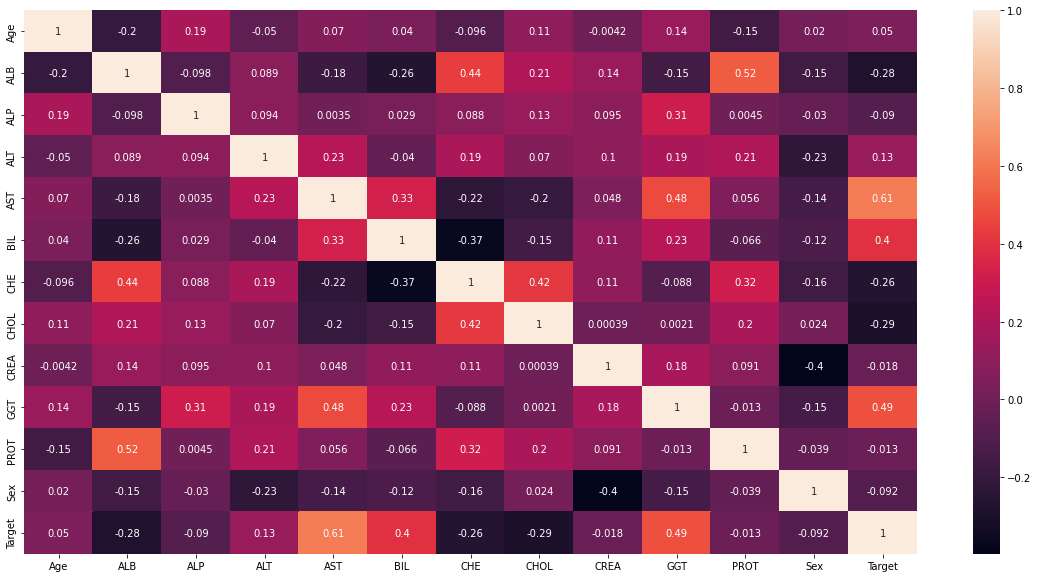

In [50]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_eda_cleaned.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

> Dari hasil correlation diatas, saya menetapkan untuk mengambil kolom yang memiliki nilai correlation lebih dari sama dengan 0.1, sehingga berdasarkan hasil correlation diatas diperoleh kolom feature sebagai berikut:`ALB`, `ALT`, `AST`, `BIL`, `CHE`, `CHOL`, `GGT` dan `Target` sebagai kolom target.

In [51]:
df_eda_cleaned = df_eda_cleaned[['ALB', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'GGT', 'Target']]
df_eda_cleaned

,ALB,ALT,AST,BIL,CHE,CHOL,GGT,Target
0,44.800,39.400,28.400,23.300,7.840,7.020,78.300,0
1,46.100,34.900,37.600,4.100,13.860,8.110,76.900,0
2,24.900,49.200,24.300,4.900,3.440,5.250,83.000,1
3,34.600,24.700,31.000,12.800,6.550,5.950,25.400,0
4,43.800,29.500,32.800,4.100,7.770,5.800,53.600,0
...,...,...,...,...,...,...,...,...
483,45.900,17.100,24.300,4.800,10.010,4.950,23.500,0
484,42.400,20.300,20.000,35.200,5.460,4.450,15.900,0
485,40.300,21.400,23.900,5.500,7.520,5.730,20.100,0
486,40.000,87.500,52.600,4.800,8.700,6.460,152.500,0


### **Feature Scaling**

In [52]:
num_col = ['ALB', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'GGT']
scaler = MinMaxScaler()

df_eda_cleaned[num_col] = scaler.fit_transform(df_eda_cleaned[num_col])
df_eda_cleaned

,ALB,ALT,AST,BIL,CHE,CHOL,GGT,Target
0,0.399,0.150,0.057,0.085,0.428,0.678,0.114,0
1,0.420,0.132,0.086,0.009,0.830,0.811,0.112,0
2,0.079,0.188,0.044,0.012,0.135,0.464,0.121,1
3,0.235,0.093,0.065,0.044,0.342,0.549,0.032,0
4,0.383,0.111,0.071,0.009,0.424,0.530,0.076,0
...,...,...,...,...,...,...,...,...
483,0.416,0.063,0.044,0.012,0.573,0.427,0.029,0
484,0.360,0.075,0.030,0.132,0.270,0.367,0.018,0
485,0.326,0.080,0.042,0.015,0.407,0.522,0.024,0
486,0.322,0.337,0.134,0.012,0.486,0.610,0.229,0


> Pada tahapan Feature Scaling, kolom numerik dilakukan scaling dengan menggunakan MinMaxScaler, dikarnakan rata - rata kolom numerik yang dilakukan scaling memiliki distribusi yang tidak normal atau skew. Feature scaling ini bertujuan untuk menormalisasikan data numerik

Berdasarkan proses pada tahap Exploratory Data Analysis (EDA) - Modeling pada data traning dapat direkap sebagai berikut:

- Numerical Feature:
1. Handling missing value dengan imputasi nilai median
2. Handling Outlier dengan menggunakan winsorizer
3. Feature Selection dan diperoleh `ALB`, `ALT`, `AST`, `BIL`, `CHE`, `CHOL`, `GGT` sebagai feature dan `Target` sebagai target.
4. Feature Scaling pada kolom numerik dengan menggunkana Minmax Scaler

- Categorical Feature:
1. Ordinal Encodeng terhadap kolom `Sex`

## **6.2 Data Preprocessing**

> Pada milestone ini akan dibuat pipeline pada data preprocessing, yang nantinya akan digunakan untuk tahapan modeling. Proses Exploratory Data Analysis (EDA) - Modeling pada data traning diatas bertujuan untuk gambaran perilaku apa saja yang digunakan terhadap data train, sehingga pada pipeline bisa ditentukan perilaku apa saja yang digunakan

In [53]:
X_train[['ALB', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'GGT']]

,ALB,ALT,AST,BIL,CHE,CHOL,GGT
303,44.800,39.400,28.400,23.300,7.840,7.020,78.300
90,46.100,34.900,37.600,4.100,13.860,8.110,76.900
529,24.900,49.200,24.300,4.900,3.440,5.250,83.000
447,34.600,24.700,31.000,12.800,6.550,5.950,25.400
200,43.800,29.500,32.800,4.100,7.770,5.800,53.600
...,...,...,...,...,...,...,...
277,45.900,17.100,24.300,4.800,10.010,4.950,23.500
9,42.400,20.300,20.000,35.200,5.460,4.450,15.900
359,40.300,21.400,23.900,5.500,7.520,5.730,20.100
192,40.000,87.500,52.600,4.800,8.700,6.460,152.500


In [54]:
num_pipeline = Pipeline([
                    ('impute MV', SimpleImputer(strategy="median")),
                    ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
                    ('scaling', MinMaxScaler())
    ])

num_tr = num_pipeline.fit_transform(X_train[['ALB', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'GGT']])
num_tr

array([[0.55855856, 0.47766749, 0.31799911, ..., 0.42828552, 0.67839806,
        0.67489712],
       [0.58783784, 0.42183623, 0.4823582 , ..., 0.82988659, 0.81067961,
        0.66209419],
       [0.11036036, 0.59925558, 0.24475212, ..., 0.1347565 , 0.46359223,
        0.71787837],
       ...,
       [0.45720721, 0.25434243, 0.23760607, ..., 0.40693796, 0.52184466,
        0.14266118],
       [0.45045045, 1.        , 0.75033497, ..., 0.4856571 , 0.61043689,
        1.        ],
       [0.47297297, 0.01861042, 1.        , ..., 0.67178119, 0.4842233 ,
        1.        ]])

In [55]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['ALB', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'GGT'])
    ])

train_tr = full_pipeline.fit_transform(X_train)
train_tr.shape

(488, 7)

> Proses diatas merupakan pembuatan pipeline terhadap data X_train, yang mana nantinya pipeline ini akan digunakan pada proses pemodelan sebagai data X_train

In [56]:
X_test

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
577,51,f,37.000,NaN,164.000,70.000,9.000,3.990,4.200,67.000,43.000,72.000
52,37,m,31.400,106.000,16.600,17.000,2.400,5.950,5.300,68.000,22.900,72.300
532,71,m,14.900,69.800,19.700,95.200,9.800,13.300,2.610,9.000,7.600,47.000
346,35,f,46.100,88.700,23.100,20.000,7.700,8.410,4.790,74.000,28.100,79.300
55,37,m,41.500,64.600,23.700,29.900,9.300,5.490,3.970,100.000,10.400,69.300
...,...,...,...,...,...,...,...,...,...,...,...,...
482,54,f,43.300,76.500,19.900,22.400,7.000,8.040,6.770,67.000,17.700,73.300
294,65,m,43.100,64.800,43.100,35.600,9.500,9.600,4.030,78.000,21.900,71.500
372,41,f,39.800,67.900,19.400,19.500,12.200,7.410,5.020,64.000,27.300,65.500
513,60,f,45.400,51.400,16.400,19.000,6.800,10.780,6.790,78.000,12.500,72.800


In [57]:
test_tr = full_pipeline.transform(X_test)
test_tr

array([[ 0.38288288,  1.        ,  1.        ,  0.24324324,  0.17144763,
         0.33616505,  0.35208048],
       [ 0.25675676,  0.19478908,  0.11433676,  0.02027027,  0.30220147,
         0.46966019,  0.16826703],
       [-0.01295045,  0.23325062,  1.        ,  0.27027027,  0.79252835,
         0.14320388,  0.02834934],
       [ 0.58783784,  0.27543424,  0.16793211,  0.19932432,  0.46631087,
         0.40776699,  0.21582076],
       [ 0.48423423,  0.28287841,  0.34479678,  0.25337838,  0.27151434,
         0.30825243,  0.05395519],
       [ 0.68468468,  0.22952854,  0.3019205 ,  0.33108108,  0.29086057,
         0.42475728,  0.21307727],
       [ 0.62162162,  0.2866005 ,  0.12326932,  0.10135135,  0.52368245,
         0.60436893,  0.15363512],
       [ 0.54054054,  0.10545906,  0.38231353,  0.41216216,  0.66711141,
         0.52184466,  0.3301326 ],
       [ 0.61261261,  0.32878412,  0.23760607,  0.22297297,  0.58172115,
         0.62014563,  0.28166438],
       [ 0.51576577,  0.1774

> Proses diatas merupakan pembuatan pipeline terhadap data X_test, yang mana nantinya pipeline ini akan digunakan pada proses pemodelan sebagai data X_test

# **7. Modeling** 

## **7.1. Model Definition**

In [58]:
log_model = LogisticRegression(random_state=0)
svm_model = SVC(random_state=0)
dt_model = DecisionTreeClassifier(random_state=0)
rnd_model = RandomForestClassifier(random_state=0)

> Pada tahap model definition, model yang digunakan sebagai berikut:

1. Logistic Regression
2. SVM
3. Decision Tree Classifier
4. RandomForestClassifier

> Dari model - model ini akan dilihat performa disetiap model dan akan dilihat score cross validation dari nilai mean dan std, sehingga diperoleh satu model yang nantinya akan digunakan pada tahap selanjutnya

> Pada pemodelan ini scoring yang saya gunakan adalah recall, dikarnakan pada kasus data ini ingin difokuskan mengurangi kesalahan negatif yang mana label 1 pada kolom Target yang berarti pasien mengidap penyakit Hepatitis C didefinisikan sebagai kelas positif. Sehingga dengan menggunakan scoring recall, kita menghindari kesalahan prediksi pada label 1, atau dengan kata lain mengurangi kesalahan negatif.

> Hal itu dikarnakan, tidak ingin terjadinya kesalahan prediksi yang seharusnya pasien itu mengidap penyakit Hepatitis C dan tidak bisa melakukan donor darah malah diprediksi pasien yang bisa melakukan donor darah, hal ini dapat sangat berbahaya jika darah dari pasien yang mengidap penyakit Hepatitis C ditransfusi ke pasien atau orang lain

## **7.2. Model Training**

In [59]:
log_model.fit(train_tr, y_train)

lr_train = log_model.predict(train_tr)
lr_test = log_model.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       421
           1       0.98      0.69      0.81        67

    accuracy                           0.95       488
   macro avg       0.97      0.84      0.89       488
weighted avg       0.96      0.95      0.95       488

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.92      0.80      0.86        15

    accuracy                           0.97       122
   macro avg       0.95      0.90      0.92       122
weighted avg       0.97      0.97      0.97       122



In [60]:
svm_model.fit(train_tr, y_train)

svc_train = svm_model.predict(train_tr)
svc_test = svm_model.predict(test_tr)

print(classification_report(y_train, svc_train))
print(classification_report(y_test, svc_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       421
           1       0.97      0.87      0.91        67

    accuracy                           0.98       488
   macro avg       0.97      0.93      0.95       488
weighted avg       0.98      0.98      0.98       488

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       1.00      0.80      0.89        15

    accuracy                           0.98       122
   macro avg       0.99      0.90      0.94       122
weighted avg       0.98      0.98      0.97       122



In [61]:
dt_model.fit(train_tr, y_train)

dtc_train = dt_model.predict(train_tr)
dtc_test = dt_model.predict(test_tr)

print(classification_report(y_train, dtc_train))
print(classification_report(y_test, dtc_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       421
           1       1.00      1.00      1.00        67

    accuracy                           1.00       488
   macro avg       1.00      1.00      1.00       488
weighted avg       1.00      1.00      1.00       488

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       107
           1       0.73      0.73      0.73        15

    accuracy                           0.93       122
   macro avg       0.85      0.85      0.85       122
weighted avg       0.93      0.93      0.93       122



In [62]:
rnd_model.fit(train_tr, y_train)

rfc_train = rnd_model.predict(train_tr)
rfc_test = rnd_model.predict(test_tr)

print(classification_report(y_train, rfc_train))
print(classification_report(y_test, rfc_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       421
           1       1.00      1.00      1.00        67

    accuracy                           1.00       488
   macro avg       1.00      1.00      1.00       488
weighted avg       1.00      1.00      1.00       488

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       107
           1       0.81      0.87      0.84        15

    accuracy                           0.96       122
   macro avg       0.90      0.92      0.91       122
weighted avg       0.96      0.96      0.96       122



> Berdasarkan hasil diatas, yang merupakan performa dari masing - masing model dengan menggunakan model baseline. Dapat diketahu bahwa berdasarkan performa, model SVM lebih baik dibandingkan model yang lainnya karna hasil recall training dan testing memiliki selisih yang tidak terlalu tinggi atau bisa disebut bestfit, dan memiliki recall pada testing sebesar 80% yang berarti model dapat memprediksi pasien yang mengidap penyakit Hepatitis C dengan benar sebesar 80%

> Akan tetapi selain dilihat dari performa awal model, akan dilakukan cross validasi untuk menentukan model terbail yang digunakan berdasarkan nilai mean dan standar deviasinya

## **7.3. Model Evaluation**

In [63]:
# Logistic Regression
log_model_train_cross_val = cross_val_score(log_model, 
                                           train_tr, 
                                           y_train, 
                                           cv=5, 
                                           scoring='recall')

print('accuracy Score - Mean - Cross Validation : ', log_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', log_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.654945054945055
accuracy Score - Std - Cross Validation  :  0.11347982983231285


In [64]:
# SVM
svm_model_train_cross_val = cross_val_score(svm_model, 
                                           train_tr, 
                                           y_train, 
                                           cv=5, 
                                           scoring='recall')

print('accuracy Score - Mean - Cross Validation : ', svm_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', svm_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.7593406593406593
accuracy Score - Std - Cross Validation  :  0.0891668693411024


In [65]:
# Decision Tree
dt_model_train_cross_val = cross_val_score(dt_model, 
                                           train_tr, 
                                           y_train, 
                                           cv=5, 
                                           scoring='recall')

print('accuracy Score - Mean - Cross Validation : ', dt_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', dt_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.7923076923076924
accuracy Score - Std - Cross Validation  :  0.10936136531538222


In [66]:
# Random Forest
rnd_model_train_cross_val = cross_val_score(rnd_model, 
                                           train_tr, 
                                           y_train, 
                                           cv=5, 
                                           scoring='recall')

print('accuracy Score - Mean - Cross Validation : ', rnd_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', rnd_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.743956043956044
accuracy Score - Std - Cross Validation  :  0.10469015704452356


In [67]:
rata = []
dev = []
for i in [log_model_train_cross_val,svm_model_train_cross_val,
          dt_model_train_cross_val,rnd_model_train_cross_val]:
    rata.append(i.mean())
    dev.append(i.std())

model = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
hasil_cros_validation = pd.DataFrame(model)
hasil_cros_validation['mean']=rata
hasil_cros_validation['std']=dev

hasil_cros_validation.sort_values(by= 'mean' , ascending = False)

,0,mean,std
2,Decision Tree,0.792,0.109
1,SVM,0.759,0.089
3,Random Forest,0.744,0.105
0,Logistic Regression,0.655,0.113


> Pada tahap ini dilakukan cross validation dimasing - masing model dan dilihat nilai mean dan standar deviasinya, suatu model dikatakan baik berdasarkan cross validation dengan nilai mean tinggi dan nilai standar deviasi rendah.

> Dari hasil cross validation diatas diketahui bahwa model SVM merupakan model terbaik dibandingkan model yang lainnya dikarnakan model SVM memiliki nilai akurasi mean tertingg kedua dan memiliki selisih yang tidak terlalu besar dengan mean tertinggi pertama dan nilai akurasi standar deviasi paling rendah, sehingga model SVM dipilih sebagai model terbaik dibandingkan model yang lainnya.

### **Hyperparameter Tuning**

In [68]:
params = [
    {'C': [1.0, 2.0, 3.0, 4.0],        
     'kernel': ['linear', 'poly', 'rbf'],            
     'gamma': ['scale', 'auto'],              
     'max_iter': [-1, 5, 10, 15]},      
  ]

svm_model = SVC(random_state=0)

grid_search = GridSearchCV(svm_model, params, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(train_tr, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid=[{'C': [1.0, 2.0, 3.0, 4.0], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf'],
                          'max_iter': [-1, 5, 10, 15]}],
             return_train_score=True, scoring='recall')

> Pada tahap hyperparameter tuning, dimana pada tahapan ini saya menetapkan sebanyak 96 kombinasi hyperparamete dan akan ditentukan kombinasi hyperparameter mana yang terbaik, yang nantinya akan dibandingkan dengan model parameter baseline

> 

In [69]:
grid_search.best_params_

{'C': 1.0, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': 10}

> Dari hasil hyperparameter tuning diperoleh parameter terbaik pada model SVM yaitu:

>- C = 1.0
>- gamma = 'auto'
>- kernel = 'poly'
>- max_iter = 10


In [70]:
grid_search.best_score_

0.9252747252747252

In [71]:
grid_search.best_estimator_

SVC(gamma='auto', kernel='poly', max_iter=10, random_state=0)

In [72]:
model = grid_search.best_estimator_

model.fit(train_tr, y_train)

model_train = model.predict(train_tr)
model_test = model.predict(test_tr)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.97      0.16      0.28       421
           1       0.16      0.97      0.27        67

    accuracy                           0.27       488
   macro avg       0.56      0.57      0.27       488
weighted avg       0.86      0.27      0.28       488

              precision    recall  f1-score   support

           0       0.92      0.10      0.18       107
           1       0.13      0.93      0.22        15

    accuracy                           0.20       122
   macro avg       0.52      0.52      0.20       122
weighted avg       0.82      0.20      0.19       122



### **Perbandingan performansi antara sebelum dan sesudah dilakukan Hyperparameter Tuning**

In [73]:
# Sebelum
svm_model.fit(train_tr, y_train)

svc_train = svm_model.predict(train_tr)
svc_test = svm_model.predict(test_tr)

print(classification_report(y_train, svc_train))
print(classification_report(y_test, svc_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       421
           1       0.97      0.87      0.91        67

    accuracy                           0.98       488
   macro avg       0.97      0.93      0.95       488
weighted avg       0.98      0.98      0.98       488

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       1.00      0.80      0.89        15

    accuracy                           0.98       122
   macro avg       0.99      0.90      0.94       122
weighted avg       0.98      0.98      0.97       122



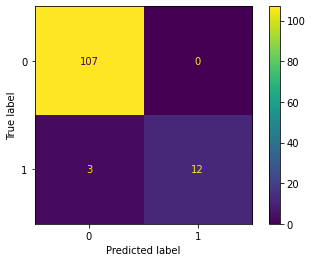

In [74]:
cm = confusion_matrix(y_test, svc_test, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_model.classes_)

disp.plot()
plt.show()

In [75]:
# Sesudah
model = grid_search.best_estimator_

model.fit(train_tr, y_train)

model_train = model.predict(train_tr)
model_test = model.predict(test_tr)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.97      0.16      0.28       421
           1       0.16      0.97      0.27        67

    accuracy                           0.27       488
   macro avg       0.56      0.57      0.27       488
weighted avg       0.86      0.27      0.28       488

              precision    recall  f1-score   support

           0       0.92      0.10      0.18       107
           1       0.13      0.93      0.22        15

    accuracy                           0.20       122
   macro avg       0.52      0.52      0.20       122
weighted avg       0.82      0.20      0.19       122



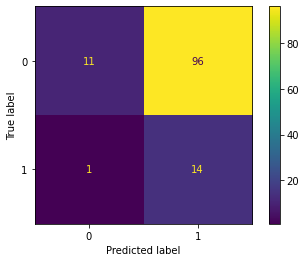

In [76]:
cm = confusion_matrix(y_test, model_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.show()

> Berdasarkan perbandingan performansi antara model SVM sebelum dan sesudah dilakukan Hyperparameter Tuning dapat diinterpretasi sebagai berikut:

- Sebelum dilakukannya Hyperparameter Tuning atau model SVM menggunakan parameter baseline memiliki model yang bestfit, dikarnakan performa test memiliki selisih yang tidak terlalu besar dengan performa train dan berdasarkan confusion_matrix model SVM sebelum dilakukan Hyperparameter Tuning sangat baik dalam melakukan prediksi terhadap label 0

- Pada model SVM sebelum hyperparameter tuning memiliki nilai recall pada data testing yaitu sebesar 80% yang berarti kesalahan negatifnya tidak terlalu besar, dikarnakan semakin besar nilai recall semakin kecil kesalahan negatif. Dan berdasarkan confusion_matrix model bisa memprediksi benar positif pada kelas 1 yaitu sebanyak 12 data dari 15 data sedangkan memprediksi salah negatif sebanyak 3 data dari 15 data. Sehingga dapat disimpulkan model sudah dikategorikan baik

- Setelah dilakukannya Hyperparameter Tuning, model SVM lebih baik dari pada model sebelum dilakukan hyperparameter tuning berdasarkan nilai recallnya, dikarnakan model setelah hyperparameter tuning memiliki model yang bestfit dilihat dari performa test memiliki selisih yang tidak terlalu besar dengan performa train dan berdasarkan confusion_matrix model SVM setelah dilakukan Hyperparameter Tuning sangat baik dalam melakukan prediksi label 1 akan tetapi buruk dalam melakukan prediksi terhadap label 0, hal ini mungkin bisa saja dikarnakan pada model SVM dengan menggungakan hyperparameter tuning scoring yang digunakan adalah recall, yang menyebabkan model hanya fokus pada prediksi label 1

- Dan pada model SVM setelah hyperparameter tuning memiliki nilai recall pada data testing yaitu sebesar 93% yang berarti kesalahan negatifnya tidak terlalu besar. Dan berdasarkan confusion_matrix model bisa memprediksi benar positif pada kelas 1 yaitu sebanyak 14 data dari 15 data sedangkan memprediksi salah negatif sebanyak 1 data dari 15 data. Sehingga dapat disimpulkan model sudah dikategorikan baik

- Berdasarkan uraian diatas dapat disimpulkan bahwa model SVM setelah hyperparameter tuning lebih baik dibandingkan model SVM sebelum parameter tuning atau parameter baseline berdasarkan scoring recall

### **Combine Pipeline: Preprocess + Model**

In [77]:
from sklearn import set_config
set_config(display='diagram')

In [78]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute MV',
                                                  SimpleImputer(strategy='median')),
                                                 ('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             tail='both')),
                                                 ('scaling', MinMaxScaler())]),
                                 ['ALB', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL',
                                  'GGT'])])

In [79]:
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", model)
])

all_process.fit(X_train, y_train)
hasil_train = all_process.predict(X_train)
hasil_test = all_process.predict(X_test)

print(classification_report(y_train, hasil_train))
print(classification_report(y_test, hasil_test))

              precision    recall  f1-score   support

           0       0.97      0.16      0.28       421
           1       0.16      0.97      0.27        67

    accuracy                           0.27       488
   macro avg       0.56      0.57      0.27       488
weighted avg       0.86      0.27      0.28       488

              precision    recall  f1-score   support

           0       0.92      0.10      0.18       107
           1       0.13      0.93      0.22        15

    accuracy                           0.20       122
   macro avg       0.52      0.52      0.20       122
weighted avg       0.82      0.20      0.19       122



In [80]:
all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute MV',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['ALB', 'ALT', 'AST', 'BIL',
                                                   'CHE', 'CHOL', 'GGT'])])),
                ('classification',
                 SVC(gamma='auto', kernel='poly', max_iter=10,
                     random_state=0))])

> Setelah diperoleh model terbaik berdasarkan cros validation dan dilakukan hyperparameter tuning, selanjutnya model terbaik diterapkan ke dalam pipeline, sehingga dengan menggunakan pipeline bisa melakukan modelingan

> Berdasarkan hasil classification report yang menggunakan pipeline dengan yang tidak memiliki hasil yang sama, yang berarti pipeline berhasil diterapkan

# **8. Model Saving**

In [88]:
import pickle

# save model
pickle.dump(all_process, open("M2P1_pred.pkl", "wb"))

In [89]:
# STEP 1 - Import saved model
model = pickle.load(open("M2P1_pred.pkl", "rb"))

In [90]:
# STEP 2 - Prepare input data from user
inf = df_inf.head(1)
inf

,Target,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,36,m,47.800,89.000,48.500,38.400,8.600,8.260,5.620,96.000,21.900,76.200


In [91]:
# STEP 3 - model predict input data
Category = model.predict(inf).tolist()[0]
Category

0

In [92]:
# STEP 4 - interpretation for human language
if Category == 0:
    print('Blood Donor')
else:
    print('Hepatitis C')

Blood Donor


> Proses diatas merupakan saving Model terbaik yang akan digunakan kembali dalam melakukan deployment 

# **9. Model Inference**

In [93]:
model_inf = df_inf.head(2)
model_inf

,Target,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,36,m,47.800,89.000,48.500,38.400,8.600,8.260,5.620,96.000,21.900,76.200
1,0,56,f,45.100,79.100,39.000,30.500,5.200,6.470,5.100,64.000,145.300,66.700


In [94]:
all_process.predict(model_inf)

array([0, 0])

> Pada tahapan model inference, model yang saya gunakan pada tahapan ini adalah model SVM yang sudah dilakukan hyperparameter tuning dan dimasukkan kedalam pipeline, dan ketika dimasukan data baru pipeline dapat berjalan dan melakukan prediksi yang berarti pipeline dapat digunakan dan dapat berjalan dalam melakukan prediksi terhadap data baru

# **10. Conclusions** 

Dari overall analysis dapat disimpulkan bahwa:

1. Pada milestone ini dilakukan pembuatan beberapa model machine learning Supervised Classification untuk memprediksi pasien yang mengidap penyakit Hepatitis C dari dataset Hepatitis C Prediction Dataset yang terdiri dari 615 entri data dan 14 kolom

2. Pada kolom Category dilakukan feature engineering yang mana label 0=Blood Donor akan didefinisikan sebagai label 0 atau Blood Donor yang mana pasien tidak mengidap penyakit Hepatitis C dan dapat melakukan donor darah, Sedangkan label 3=Cirrhosis, 1=Hepatitis, 2=Fibrosis dan 0s=suspect Blood Donor akan didefinisikan sebagai label 1 atau Hepatitis C yang berarti pasien mengidap penyakit Hepatitis C

3. Scoring yang di gunakan pada milestone ini adalah recall, dikarnakan pada kasus data ini ingin difokuskan mengurangi kesalahan negatif yang mana label 1 pada kolom Target yang berarti pasien mengidap penyakit Hepatitis C didefinisikan sebagai kelas positif. Sehingga dengan menggunakan scoring recall, kita menghindari kesalahan prediksi pada label 1, atau dengan kata lain mengurangi kesalahan negatif.

4. Pada tahap Exploratory Data Analysis (EDA) - Modeling dilakukan perlakuan sebagai berikut:

> - Numerical Feature:
1. Handling missing value dengan imputasi nilai median
2. Handling Outlier dengan menggunakan winsorizer
3. Feature Selection dan diperoleh `ALB`, `ALT`, `AST`, `BIL`, `CHE`, `CHOL`, `GGT` sebagai feature dan `Target` sebagai target.
4. Feature Scaling pada kolom numerik dengan menggunkana Minmax Scaler

> - Categorical Feature:
1. Ordinal Encodeng terhadap kolom `Sex`

5. Dilakukan pembuatan pipeline pada proses preprocessing dan modeling

6. Pada Model definitio terdapat beberapa model yang digunakan yaitu model:
 - Logistic Regression
 - SVM
 - Decision Tree Classifier
 - RandomForestClassifier

7. Dari model - model diatas, dilakukan cross validation untuk menentukan model terbaik berdasarkan nilai mean dan nilai standar deviasinya. Berdasarkan hasil cross validation diperoleh model terbaik yaitu model SVM dengan nilai mean 0.759 dan nilai standar deviasi 0.089

8. Setelah melakukan cross validation, selanjutnya dilakukan hyperparameter tuning terhadap model yang sudah ditentukan, sehingga dengan menggunakan hyperparameter tuning diperoleh best parameter model SVM adalah sebagai berikut:
 - C = 1.0
 - gamma = 'auto'
 - kernel = 'poly'
 - max_iter = 10

9. Berdasarkan classification_report diketahui bahwa model SVM setelah melakukan hyperparameter tuning memiliki model yang bestfit dilihat dari performa nilai recall test memiliki selisih yang tidak terlalu besar dengan performa train. Dan berdasarkan nilai recall, model bisa memprediksi benar positif pada kelas 1 yaitu sebanyak 14 data dari 15 data sedangkan memprediksi salah negatif sebanyak 1 data dari 15 data. Sehingga dapat disimpulkan model sudah dikategorikan baik

**Future Importent**

> Walawpun model yang terbentuk sudah dirasa baik dengan 93% memprediksi benar terhadap pasien yang mengidap penyakit Hepatitis C, akan tetapi dataset pada target yang digunakan pada model ini memiliki data imbalance, hal ini perlu diperhatikan untuk kedepannya. Dan perlu dicoba membuat model dengan handling imbalance dan dilihat performa dari model yang terbentuk apakah lebih baik dibandingankan model dengan handling imbalance atau tanpa handling imbalance

> Dan pada model SVM menggunakan parameter dari hasil hyperparameter tuning dengan menggunakan scoring recall pada saat hyperparameter tuning  hal ini kemungkinan menyebabkan sangat baik dalam melakukan prediksi label 1 akan tetapi buruk dalam melakukan prediksi terhadap label 0, hal ini mungkin bisa saja dikarnakan pada model SVM dengan menggungakan hyperparameter tuning scoring yang digunakan adalah recall, yang menyebabkan model hanya fokus pada prediksi label 1. Hal ini perlu menjadi pertimbangan untuk kedepannya